# <b> Github Link :- https://github.com/HerePraveenPal/Hotel_Booking_EDA

# <b>Problem Statment

#### <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

#### <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

#### <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [66]:
import warnings
warnings.filterwarnings('ignore')

# <b> Collecting Data </b>

In [67]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
path = "/content/drive/MyDrive/Colab Notebooks/Bike Sharing EDA/Hotel Bookings.csv"

In [70]:
data = pd.read_csv(path)

In [71]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [72]:
data.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [73]:
data.shape

(119390, 32)

In [74]:
list(data.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

###We can see that, there are 32 columns in the dataframe.###

In [75]:
#Basic Informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

###  This dataset contains the information about various hotels across the globe, type of hotel, records on type of customers, number of customers, length of stay, number of adults, children, bookings made across different timelines, etc, etc.,

###  We have only focused on certain variables for our data exploration which are the key aspects which impacts alot for our analysis on our data.
###  So, now, we would proceed further for the steps involved in our analysis.

# <b> Data Cleaning </b>

In [76]:
data.isnull()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [77]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [78]:
#Checking the number of null values in each columns
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

We are replacing all the null values with 'Mean values' for 'Numerical Variable' and with 'Absent' for 'categorical Variables'.

In [79]:
data["children"].fillna(data["children"].mean(),inplace = True)
data["country"].fillna("Absent",inplace = True)
data["agent"].fillna(data["agent"].mean(),inplace = True)
data["company"].fillna(data["company"].mean(),inplace = True)

In [80]:
#Ensure there is no null value in our dataset.
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [81]:
# Creating a copy of dataframe

df1 = data.copy()

First of all we will try to understand the meaning of all columns of the dataframe. \
For this we will see the unique values attained by each column whose meaning we are unable to understand.

In [82]:
df1['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [83]:
df1['is_canceled'].unique()

array([0, 1])

In [84]:
df1['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [85]:
df1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [86]:
df1['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [87]:
df1['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [88]:
df1['children'].unique()    # This column has 0 as well as null values

array([ 0.       ,  1.       ,  2.       , 10.       ,  3.       ,
        0.1038899])

# <b> Exploratory Data Analysis </b>

## <b> Hotel Wise Analysis </b> #

### <b> Q1) What is the percentage of bookings in each hotel? </b> ###

([<matplotlib.patches.Wedge at 0x7c9c0a071360>,
 [Text(-0.956416133381298, -0.5433858480011854, 'City Hotel'),
  Text(1.0433630545977801, 0.592784561455838, 'Resort Hotel')],
 [Text(-0.5216815272988897, -0.29639228072791923, '66.4%'),
  Text(0.6086284485153717, 0.3457909941825721, '33.6%')])

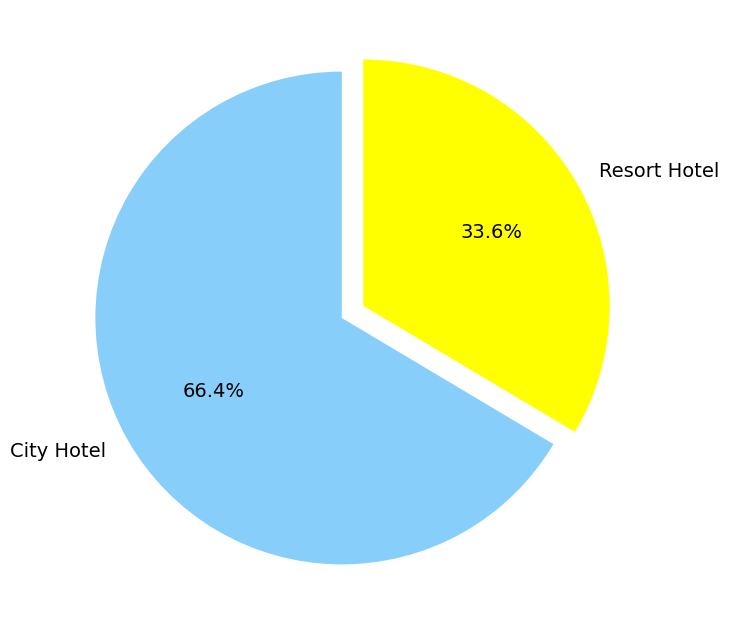

In [89]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8,8

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = data['hotel'].value_counts().index.tolist()

# Convert value counts to list
sizes = data['hotel'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other
explode = (0, 0.1)

# Determine colour of pie chart
colors = ['lightskyblue','yellow']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})


Around 66% bookings are for City hotel and 33% bookings are for Resort hotel.

##What do we see here?##
It seems that a huge proportion of hotels was city hotel. Resort hotel tend to be on the expensive side and most people will just stick with city hotel.
Also, resort hotels tend to be appropriate for larger group of people.
Let's have an overview of the number of people who booked the hotel.

## <b> Hotel Type </b> ##

Text(0, 0.5, 'Quantity')

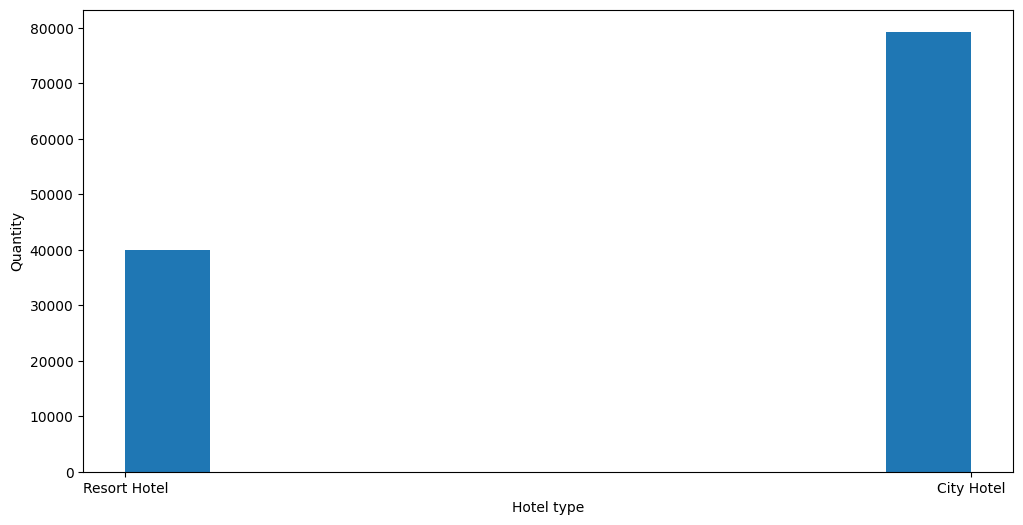

In [90]:
fig,ax = plt.subplots(figsize=(12,6))
ax.hist(data['hotel'])
ax.set_xlabel('Hotel type')
ax.set_ylabel('Quantity')

In [91]:
# Looking into adults.
# Using groupby to group according to hotel types only.
data['adults'].groupby(data['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79330.0,1.850977,0.509292,0.0,2.0,2.0,2.0,4.0
Resort Hotel,40060.0,1.867149,0.697285,0.0,2.0,2.0,2.0,55.0


In [92]:
# Looking into children.
# Using groupby to group according to hotel types only.
data['children'].groupby(data['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79330.0,0.091370,0.372167,0.0,0.0,0.0,0.0,3.0
Resort Hotel,40060.0,0.128682,0.445195,0.0,0.0,0.0,0.0,10.0


###It seems that mean values for adults and children are higher. This means that resort hotels are better choice for large families.###

In [93]:
#Checking the value counts for 'is_cancelled" column
booking_cancelled = data["is_canceled"].value_counts()
booking_cancelled

0    75166
1    44224
Name: is_canceled, dtype: int64

In [94]:
#Checking the value counts for number of customers
customer_type = data.customer_type.value_counts()
customer_type

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

### <b> Q2) Customers Types vs Number of customers </b> ###

Text(0, 0.5, 'Number of customers')

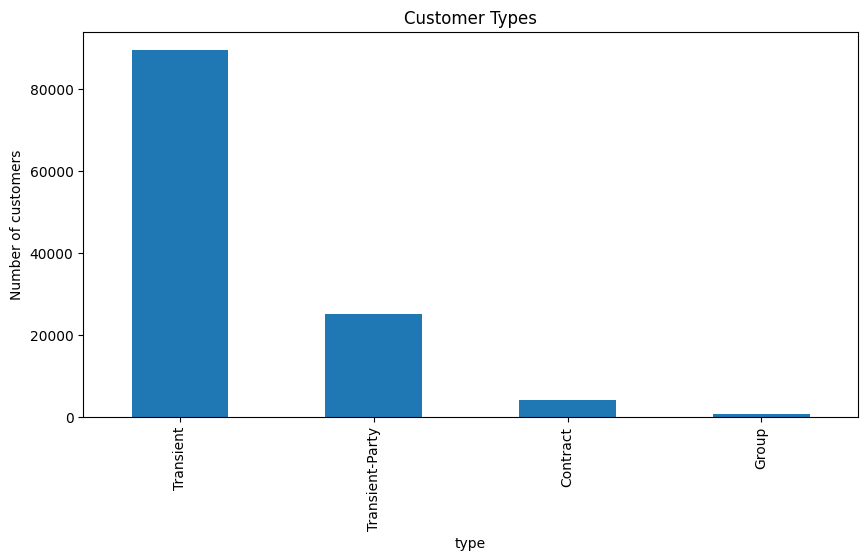

In [95]:
#Plotting the grapf for type of customers vs number of customers
plt.rcParams['figure.figsize']=(10,5)
customer_type.plot(kind='bar')
plt.title('Customer Types')
plt.xlabel('type')
plt.ylabel('Number of customers')

### <b> Q3) Booking Canceled vs Number of Bookings </b> ###

Text(0, 0.5, 'Number of bookings')

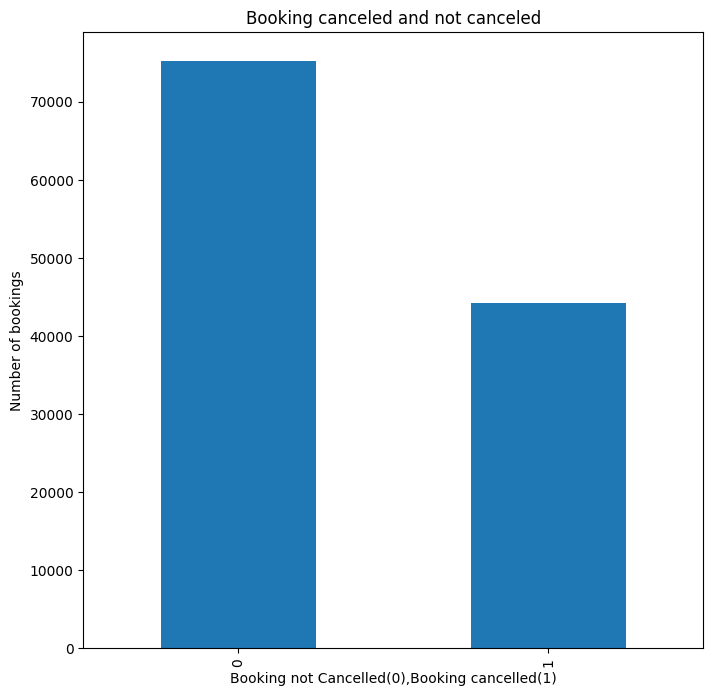

In [96]:
#Plotting the graph for Booking canceled/ Not canceled vs Number of bookings
plt.rcParams['figure.figsize'] = (8,8)
booking_cancelled.plot(kind = 'bar')
plt.title('Booking canceled and not canceled')
plt.xlabel('Booking not Cancelled(0),Booking cancelled(1)')
plt.ylabel('Number of bookings')

In [97]:
#Checking the percentage ratio of whether the booking was cancelled or not
booking_percentage = booking_cancelled/booking_cancelled.sum()*100
booking_percentage

0    62.958372
1    37.041628
Name: is_canceled, dtype: float64

##  <b> From the above cell, it is evident that approximately 63% of the bookings were not cancelled and 37% of them were cancelled </b> ##

In [98]:
grouped_by_hotel = df1.groupby('hotel')

### <b> Q4) Which hotel seems to make more revenue? </b> ###

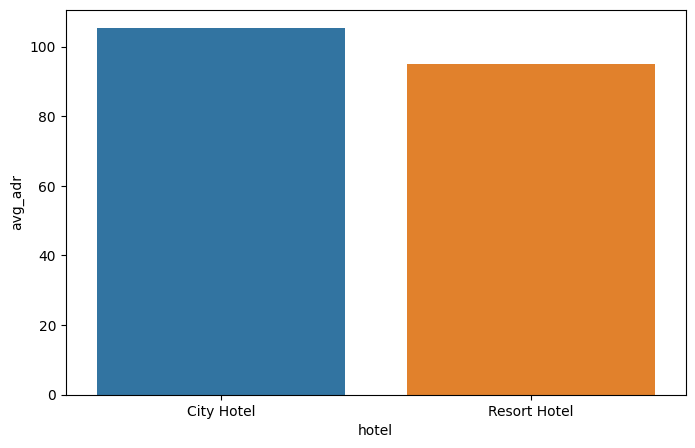

In [99]:
d1 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
plt.figure(figsize = (8,5))
sns.barplot(x = d1['hotel'], y = d1['avg_adr'] )
plt.show()

Avg adr of Resort hotel is slightly lower than that of City hotel. Hence, City hotel seems to be making slightly more revenue.

### <b> Q4) Which hotel has longer waiting time?? </b> ###

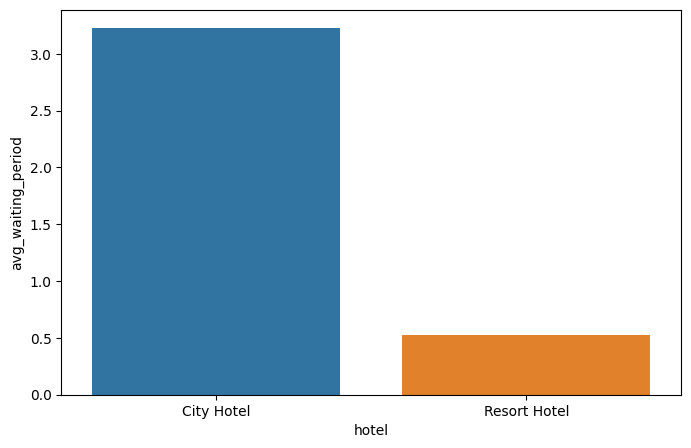

In [100]:
d5 = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,5))
sns.barplot(x = d5['hotel'], y = d5['avg_waiting_period'] )
plt.show()

City hotel has significantly longer waiting time, hence City Hotel is much busier than Resort Hotel.

### <b> Q5) Which hotel has higher bookings cancellation rate. </b> ###

In [101]:
# Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = df1[df1['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df1.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
D3

,total_cancelled_bookings,total_bookings,cancel_%
hotel,,,
City Hotel,33102,79330,41.73
Resort Hotel,11122,40060,27.76


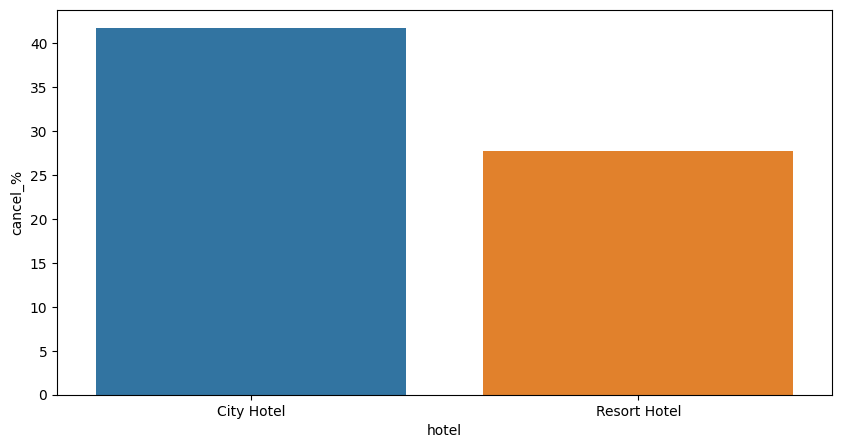

In [102]:
plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.show()

Almost 41 % of City Hotel bookings got canceled.

### <b> Q6) Which is the most common channel for booking hotels?

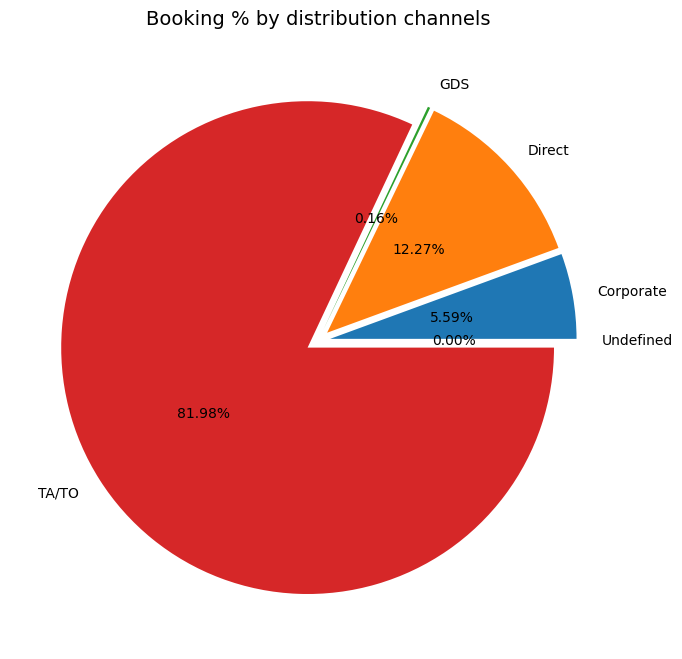

In [103]:
group_by_dc = df1.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_dc.size()/df1.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
data1 = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data1, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Booking % by distribution channels", fontsize=14);

 ### <b>Q7 Which channel is mostly used for early booking of hotels?

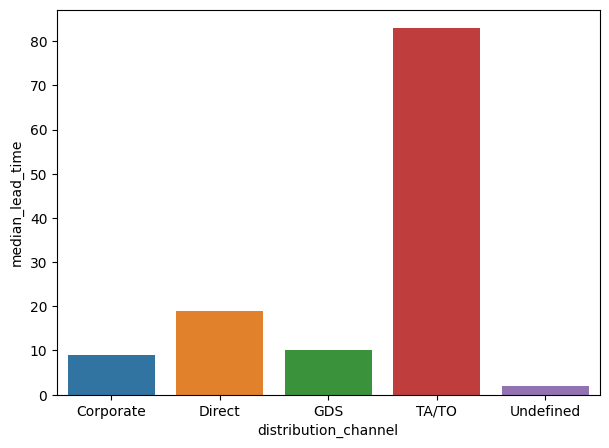

In [104]:
group_by_dc = df1.groupby('distribution_channel')
d2 = pd.DataFrame(round(group_by_dc['lead_time'].median(),2)).reset_index().rename(columns = {'lead_time': 'median_lead_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d2['distribution_channel'], y = d2['median_lead_time'])
plt.show()

TA/TO is mostly used for planning Hotel visits ahead of time. But for sudden visits other mediums are most preferred.

### <b> Q8) Which distribution channel brings better revenue generating deals for hotels?

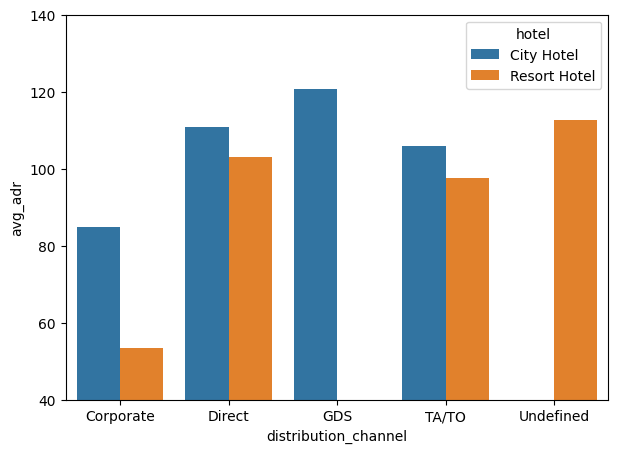

In [105]:
group_by_dc_hotel = df1.groupby(['distribution_channel', 'hotel'])
d5 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = d5['distribution_channel'], y = d5['avg_adr'], hue = d5['hotel'])
plt.ylim(40,140)
plt.show()

###GDS channel brings higher revenue generating deals for City hotel, in contrast to that most bookings come via TA/TO. City Hotel can work to increase outreach on GDS channels to get more higher revenue generating deals.

###Resort hotel has more revnue generating deals by direct and TA/TO channel. Resort Hotel need to increase outreach on GDS channel to increase revenue.

### <b> Q9) Which significant distribution channel has highest cancellation percentage?

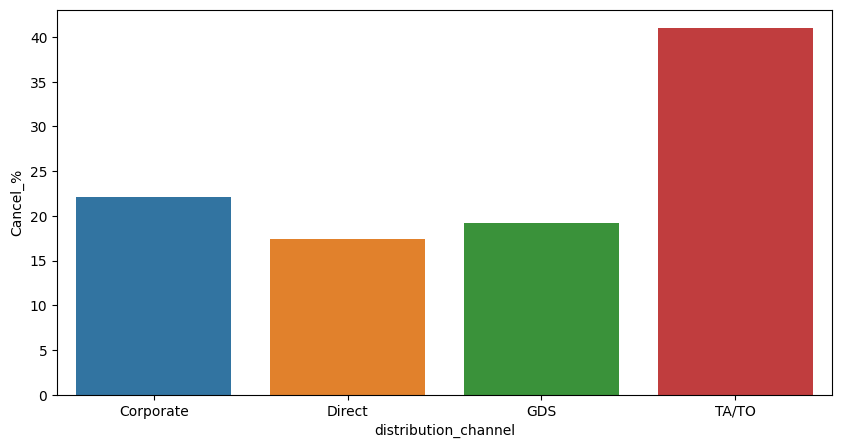

In [106]:
d1 = pd.DataFrame((group_by_dc['is_canceled'].sum()/group_by_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (10,5))
sns.barplot(x = d1.index, y = d1['Cancel_%'])
plt.show()

###TA/TO has highest booking cancellation %. Therefore, a booking via TA/TO is 30% likely to get cancelled.

###Let us see what causes the cancelation of bookings of rooms by customers


### <b> Q10) Total Number of Bookings across different years </b> ###

In [107]:
#Calculate total number of bookings across different years
year_counts = data['arrival_date_year'].value_counts().sort_index()
year_counts

2015    21996
2016    56707
2017    40687
Name: arrival_date_year, dtype: int64

Text(0.5, 1.0, 'Number of bookings on different years')

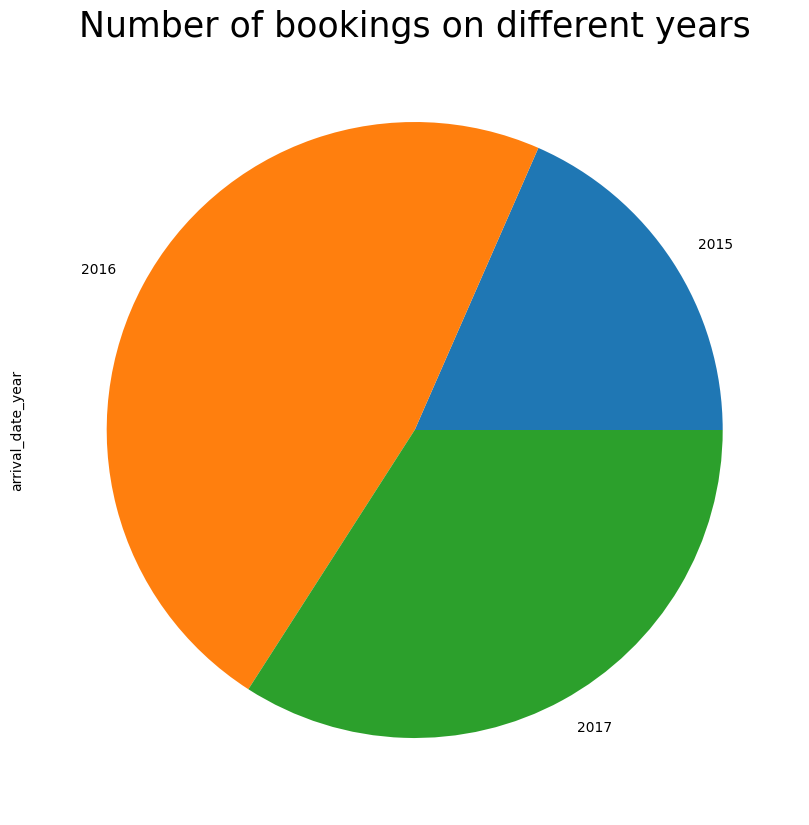

In [108]:
#Graph representing number of bookings acroos different years
plt.rcParams['figure.figsize'] = (20,10)
year_counts.plot(kind = 'pie')
plt.grid()
plt.title('Number of bookings on different years', fontsize = 25)

We can tell from the above graph that more than 50 percent of the bookings are done on the year 2016, following 2017 and 2015.

### <b>11) Booking across different year for Resort Hotel and City Hotel </b> ##

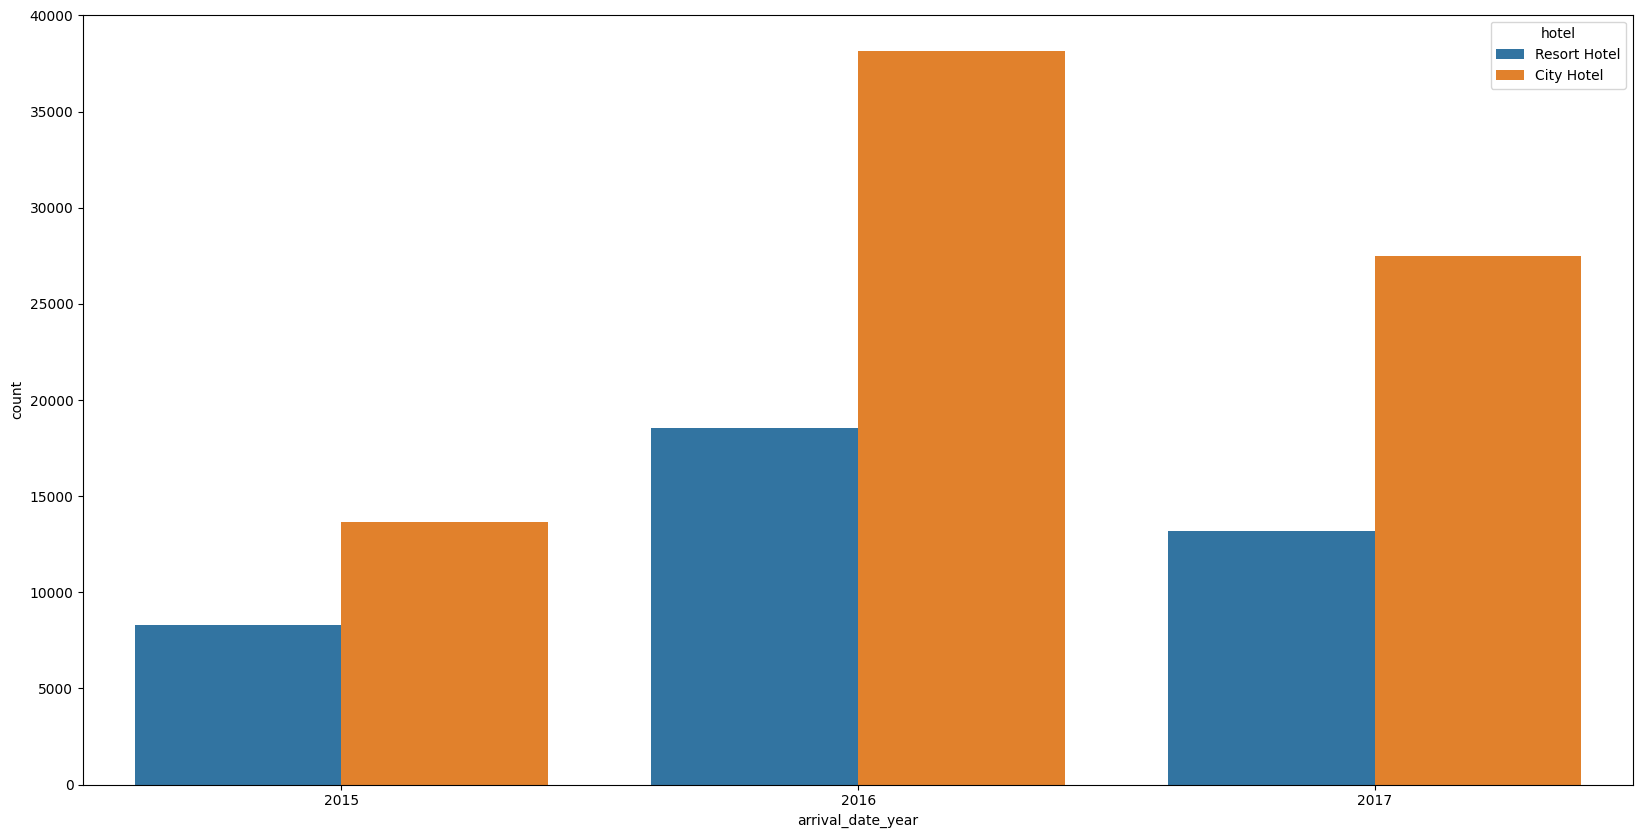

In [109]:
#Number of bookingas across different year for Resort hotel and city hotel
sns.countplot(data = data, x='arrival_date_year', hue = 'hotel')
plt.rcParams['figure.figsize']=(8,5)

We can validate from the above graph for the previous pie chart that 2016 was the year most bookings were done.
And from the above plot, we can infer that city hotel has the demand when compared to resort hotels. The number of bookings for city hotel has gone as high as more than 35000 for the year 2016, more than 25000 for the year 2017 and more than 10000 for the year 2015.
Whereas, the resorrt hotel bookings were around 17000 for the year 2016, 10000 for 2017 and 8000 for the year 2015##

### <b> 12) Number of bookings done across different months </b>

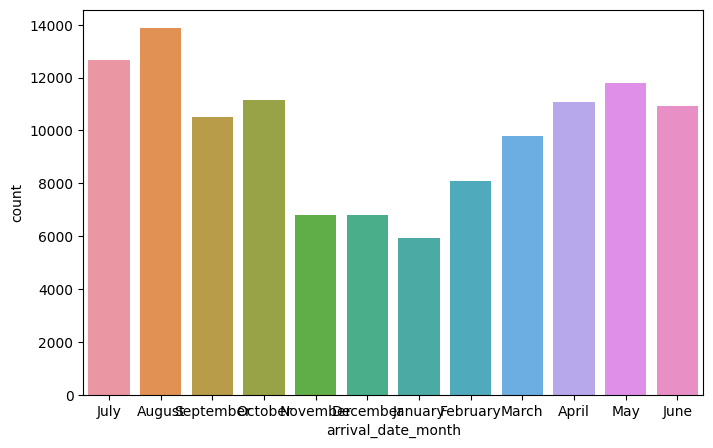

In [120]:
#Number of bookings done across different months
sns.countplot(x='arrival_date_month', data=data)
plt.rcParams['figure.figsize'] = (5, 10)
plt.show()

The above graph brings the insights about bookings made across different months, So we see that number of bookings are high on the months of July and august following, may, june, september and october.

The most probable reason for this would be that these months are most ideal seasons for vacation as much weather fluctuation will not be present.

## <b> Night Stays

### <b> Q13) Total Number of night stays for all bookings

In [121]:
#Checking number of night stays for all the bookings
total_night_stays = (data['stays_in_week_nights'] + data['stays_in_weekend_nights']).value_counts().head(10).sort_index()
total_night_stays

1     21020
2     27643
3     27076
4     17383
5      7784
6      3857
7      8655
8      1161
10     1139
14      916
dtype: int64

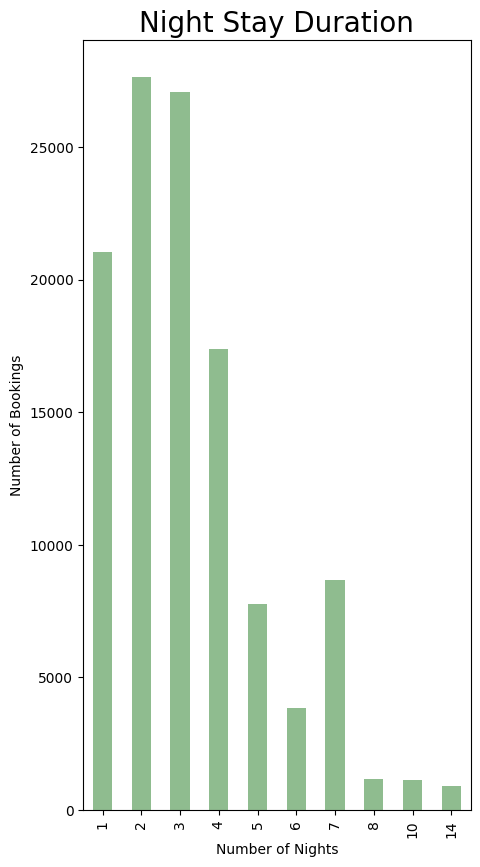

In [122]:
#Graph representing number of bookings vs numnber of night stayed
total_night_stays.plot(kind='bar', color = 'darkseagreen')
plt.title('Night Stay Duration', fontsize = 20)
plt.ylabel('Number of Bookings')
plt.xlabel('Number of Nights')
plt.rcParams['figure.figsize']=(15,10)

##Most number of people stays for 2-3 days in the hotel and even for one day.
##The demand for long stay in hotels are very less##

###  <b> Q14) top 10 Countries which made most  umber of bookings

In [123]:
  #Top 10 countries which made most number of bookings
country_counts = data['country'].value_counts().head(10)
country_counts

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

In [124]:
len(data['country'].value_counts())

178

### <b> Q15) Top Countries from different states

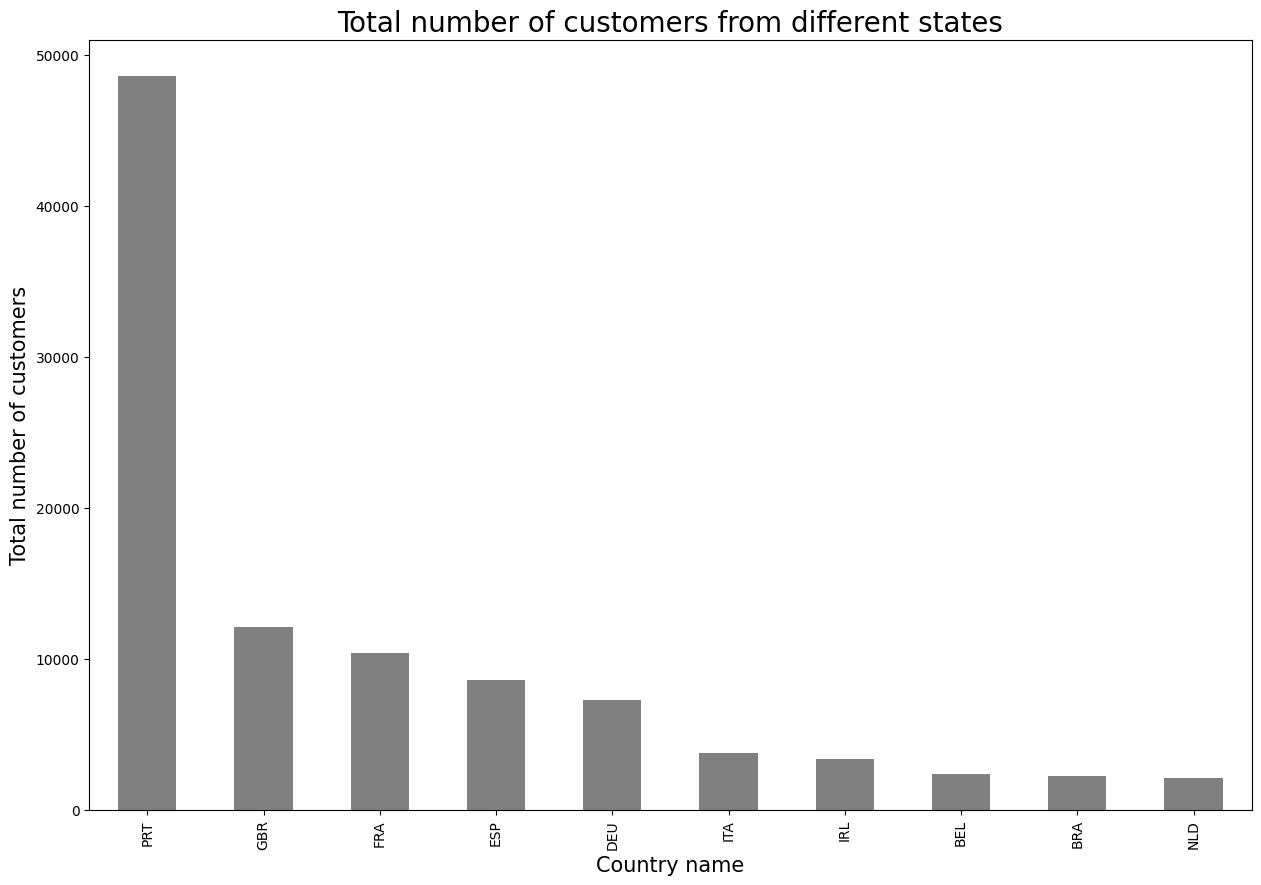

In [130]:
#Top 10 Countries
country_counts.plot(kind = 'bar', color = 'gray')
plt.title('Total number of customers from different states', fontsize = 20)
plt.xlabel('Country name',fontsize = 15)
plt.ylabel('Total number of customers',fontsize = 15)
plt.rcParams['figure.figsize']=(15,10)

Portugal leads to a outstanding number of bookings of which not even double of the second position country can beat.
United Kingdom, France, Spain and Germany are at the position of second, third, fourth and fifth respectively.

 <b> Q16) Average Daily Rayes for Different months

Text(0.5, 1.0, 'Average daily rate for different months')

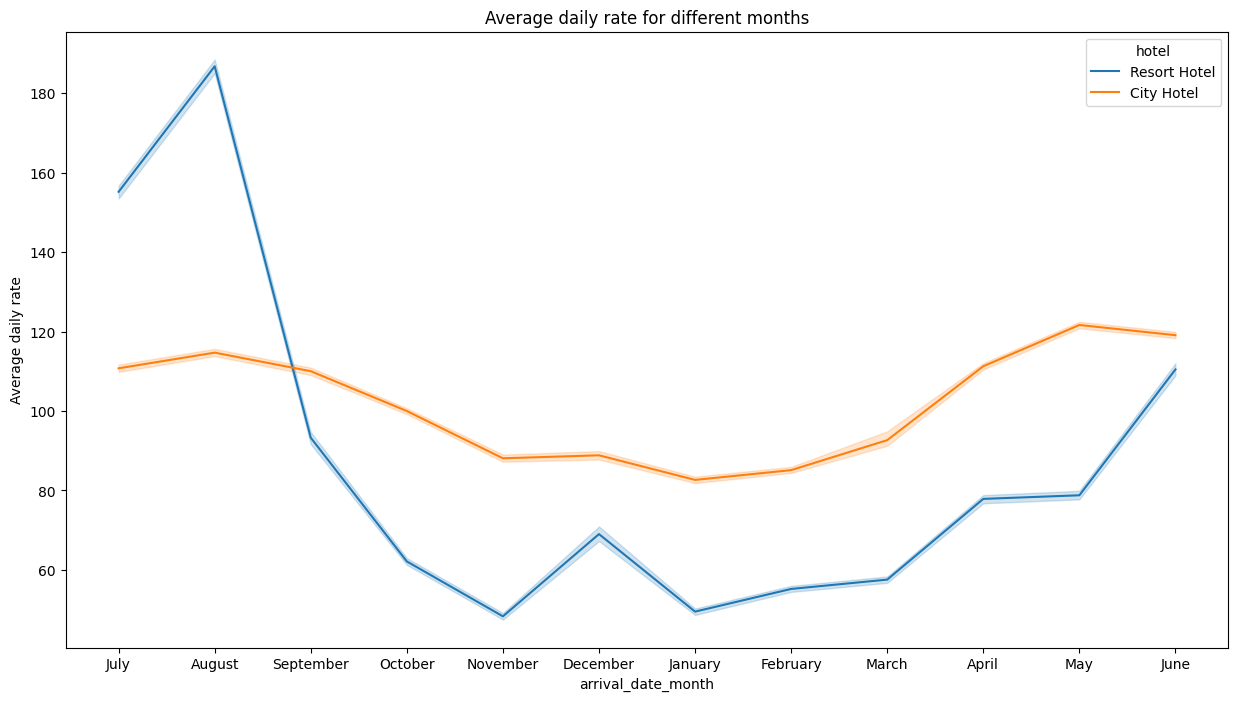

In [126]:
#Average daily rate for different months for city hotel and resort hotel
plt.figure(figsize = (15,8))
sns.lineplot(x='arrival_date_month', y='adr', data=data, hue = 'hotel')
plt.ylabel('Average daily rate')
plt.title('Average daily rate for different months')

The average daily rates are high during the months of may, june, july and august for City hotels
The average daily rates are high during the months of july, august and september for Resort Hotels

In [127]:
#Checking number of bookings made from different source(Market segments)
market_segment_counts = data['market_segment'].value_counts()
market_segment_counts

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [128]:
explode = (0,0.0,0.05,0.05,0.05,0.05,0.05,0.3)

  ### <b> Q16) Number of customers from differnet market segments

Text(0.5, 1.0, 'Number of customers from different market segments')

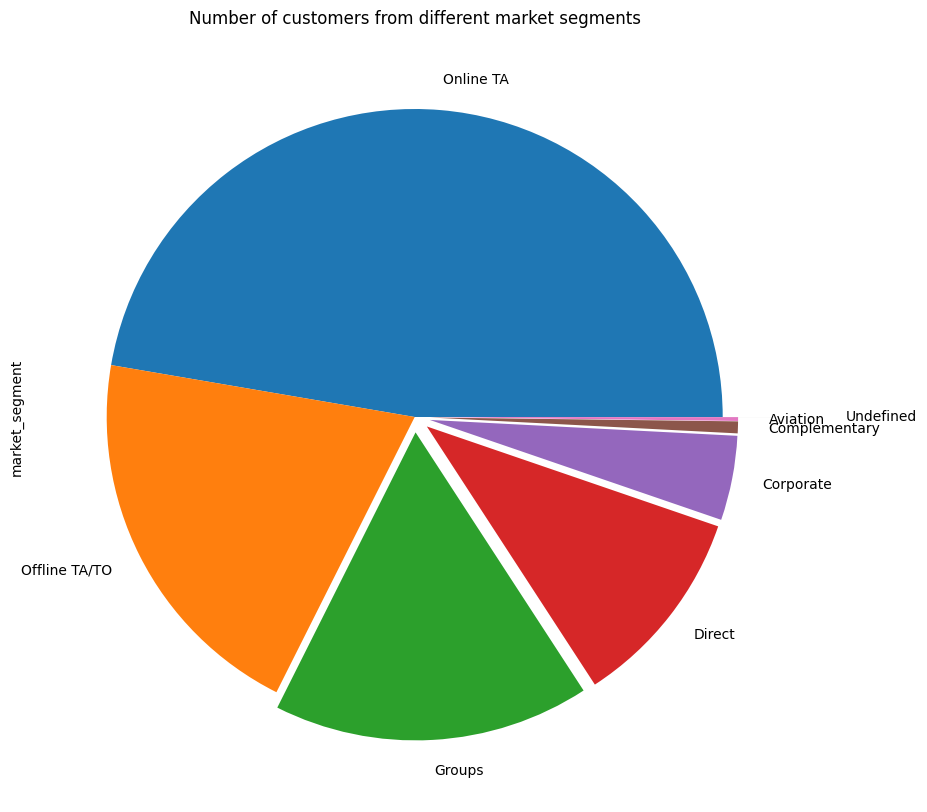

In [129]:
#Pie chart representing number of customers from different market segments
ax =market_segment_counts.plot(kind = 'pie', figsize=(20,10),explode = explode )
plt.title('Number of customers from different market segments')

Onine Travel agency segment gives the high amount of leads for the hotel booking than that of any other sourses of Market segments.

We can report that we need to target our marketting area on online TA websites or apps and focus majorly on online TA.

The following majority market segments are offline travel agencies, groups and direct customers.

# <b> Conclusion </b>

1. Almost 66% Bookings are for City hotel and 33% Bookings are for Resort hotel, therefore City hotel is busier than resort hotel
2. Out of 119000 customer dataset, 75166 customers checked in hotel while 44224 customers cancelled their bookings, that is about 37% of the booking got cancelled whereas 63% customers checked in the hotel.
3. Mostly guests stay for less than 5 days in Hotel and for longer stays Resort hotel is preferred
4. Almost 30% of bookings via TA/TO are cancelled
5. Majority of the deposit type is of **'No deposit'** type, which itself concludes the high rate of cancellation rate.
6. From the given dataset, we can see 2016 is the year in which hotel bookings are the highest.
7. We can also see the trend in the middle of the year as those season has less weather condition and holidays are more during that season. We can also infer that winter season has the lowest number of bookings around the globe and we can assume it because of the weather condition.
8. City hotels are of in high demand compared to resort in all aspects due to its reliability of majority of the population.
9. Most of the customers prefer to stay for one, two and three nights and majoritily its two and three night which tops.
10. Among the top 10 countries with respect to number of bookings, most of them are European countries which belongs to the list of which Postugal stands first with 48.5k bookings.
11. For resort hotels, ADR is more expensive during June, July, August and September whereas for city hotels, ADR is more expensive during May, June july and August.
So, Overall ADR of both cities are more expensive between May and September.
12. Online Travel agencies providess high amount of leads and customers following Offline TA, Groups, Direct, etc.,
13. For Customers, generally the longer stays(more than 15 days) can result in better deals in term of low adr.

So, we an conclude that we need to focus our marketting area on online TA since majority of the visitors tend to reach out to them.
